In [1]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;

using Plots

  Activating project at `~/Projects/birefringence/GSHEIntegrator`


In [95]:
geometry = GSHEIntegrator.setup_geometry(
    rsource=4, θsource=π/2, ϕsource=0,
    robs=50, θobs=0.4π, ϕobs=π,
    a=0.9)


geos = [geometry];

ϵs = (10).^LinRange(-3, -1, 24);

In [96]:
geometry.ode_options.no_loops = true
geometry.ode_options.Δθ = 0.00
geometry.ode_options.horizon_tol = 1.01
geometry.ode_options.maxiters=5000

5000

In [97]:
Xgeos = GSHEIntegrator.solve_geodesics([geometry], 2);
Xgeos[1]

Solving geodesics for geometry 1/1


2×4 Matrix{Float64}:
 2.38051   1.59615  67.1199  1.38564
 0.835033  4.33914  62.0057  1.38564

In [98]:
N = 100
θs = reverse(acos.(LinRange(-1, 1, N)))
ϕs = Vector(LinRange(0, 2π, N))
loss = GSHEIntegrator.setup_geodesic_loss(geometry);
Z = GSHEIntegrator.grid_evaluate(loss, θs, ϕs);

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface.jl:331
┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase /Users/richard/.julia/packages/SciMLBase/GW7GW/src/integrator_interface

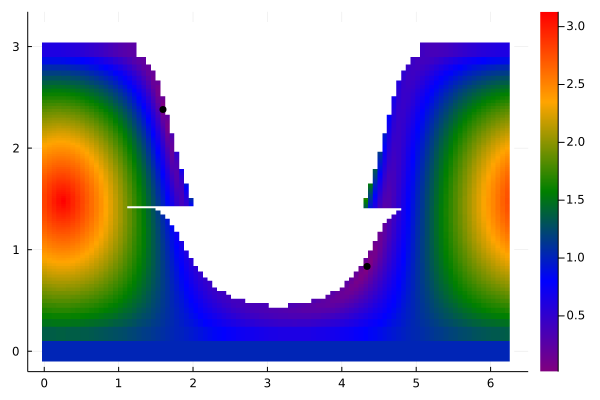

In [99]:
Plots.heatmap(ϕs, θs, Z, c=:rainbow)
Plots.scatter!(Xgeos[1][:, 2], Xgeos[1][:, 1], c=:black, label=nothing)

In [102]:
sol = GSHEIntegrator.solve_geodesic([0.2, 0.3], geometry)

retcode: Terminated
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
  0.0
 70.54149699817448
u: 2-element Vector{Vector{Float64}}:
 [0.0, 4.0, 1.5707963267948966, 0.0, 0.25577567059289064, 0.23484320677530607, 3.4775493702175053]
 [57.451964561246434, 49.999999999999986, 1.638852596586217, 1.8119272202813532, 0.7329502887516908, -0.028958876867732537, 3.4775493702175053]